<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Анализ-всего-периода" data-toc-modified-id="Анализ-всего-периода-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ всего периода</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Неделя" data-toc-modified-id="Неделя-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Неделя</a></span></li><li><span><a href="#День" data-toc-modified-id="День-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>День</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-функций" data-toc-modified-id="Подготовка-функций-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка функций</a></span></li><li><span><a href="#Среднее-значение" data-toc-modified-id="Среднее-значение-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Среднее значение</a></span></li><li><span><a href="#Взвешенная-средняя" data-toc-modified-id="Взвешенная-средняя-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Взвешенная средняя</a></span></li><li><span><a href="#Подготовка-данных-для-модели." data-toc-modified-id="Подготовка-данных-для-модели.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Подготовка данных для модели.</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Catboost</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 

#from fbprophet import Prophet

import catboost as cb

from sklearn.model_selection import cross_val_score, GridSearchCV , train_test_split, TimeSeriesSplit 

from sklearn.metrics import make_scorer, mean_squared_error

In [2]:
#открываем файл:
try:
    df = pd.read_csv('taxi.csv')
except:
    df = pd.read_csv('/datasets/taxi.csv')

In [3]:
df.head(5)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [4]:
df.shape

(26496, 2)

Таблица имеет 26496 строк и 2 столбца.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Пропущенных данных нет. Преобразуем тип в datetime из object в datatime

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

Посмотрим на максимальное значение столбца **num_orders**

In [7]:
df['num_orders'].agg(['min', 'max'])

min      0
max    119
Name: num_orders, dtype: int64

Изменим тип данных в столбце num_orders с int64 на int8 (диапозон Int8 — [-128 : 127])

In [8]:
df['num_orders'] = df['num_orders'].astype('int8')

Проверим что все ОК

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int8          
dtypes: datetime64[ns](1), int8(1)
memory usage: 233.0 KB


In [10]:
df['datetime'].agg(['min', 'max'])

min   2018-03-01 00:00:00
max   2018-08-31 23:50:00
Name: datetime, dtype: datetime64[ns]

Данные представлены с 1 марта по 31 августа 2018 года.

In [11]:
df = df.set_index('datetime')

Проверим, в хронологическом ли порядке расположены даты и время.

In [12]:
df.index.is_monotonic

True

Порядок соблюдён, атрибут вернул отрибут **True**

Мы имеем данные которые состоят из 26496 строк и двух столбцов. Данные представлены с 1 марта по 31 августа 2018 года. Пропусков в данных нет.

## Анализ

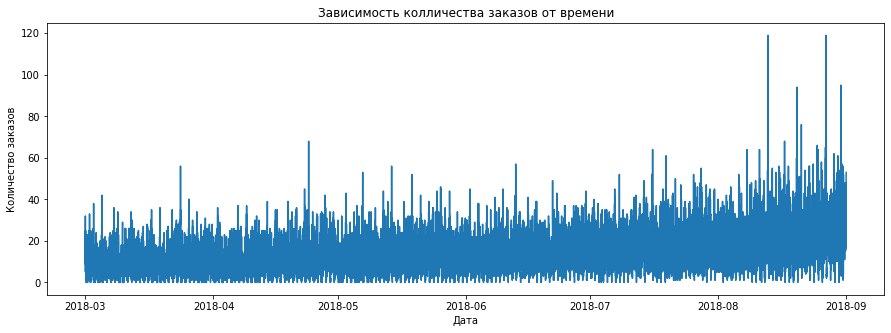

In [13]:
plt.figure(figsize=(15, 5))
plt.title('Зависимость колличества заказов от времени')
plt.ylabel("Количество заказов")
plt.xlabel("Дата")
plt.plot(df)
plt.show()

Тут ничего не понятно проведем рассемплирование по дням, проверим сначала весь период, потом неделю, потом день.

----

### Анализ всего периода

In [14]:
df_hour = df.resample('1H').sum()

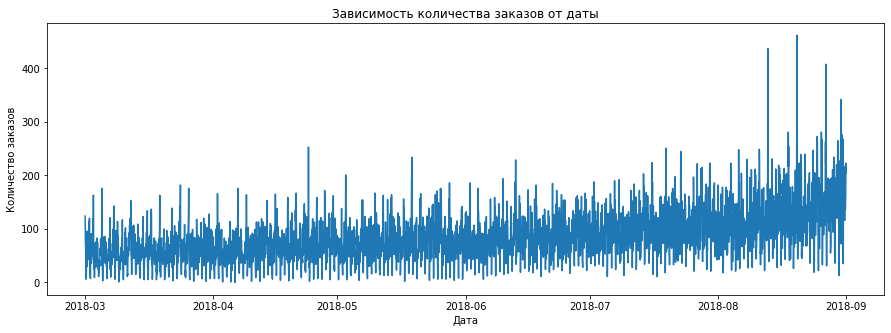

In [15]:
plt.figure(figsize=(15, 5))
plt.title('Зависимость количества заказов от даты')
plt.ylabel("Количество заказов")
plt.xlabel("Дата")
plt.plot(df_hour)
plt.show()

Посмотрим на скользящую среднюю.

In [16]:
df_hour['rolling_mean'] = df_hour['num_orders'].shift().rolling(144).mean()
df_hour['std'] = df_hour['num_orders'].rolling(144).std()
df_hour = df_hour.dropna()

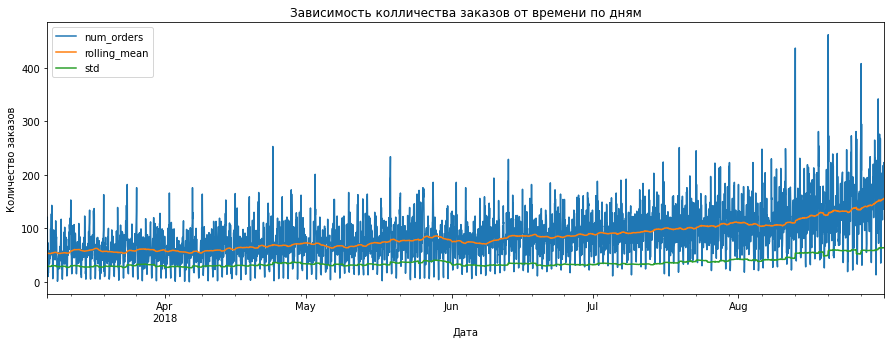

In [17]:
df_hour[['num_orders', 'rolling_mean', 'std']].plot(figsize=(15,5))
plt.title('Зависимость колличества заказов от времени по дням')
plt.ylabel("Количество заказов")
plt.xlabel("Дата")
plt.show()

Временной ряд не постоянен, среднее значение со временем увеличивается, значит наблюдается тренд на увеличение количества заказов такси от месяца к месяцу. В тоже временя стандартное отклонение почти постоянно. Значит значения не волатильны.

Посмотрим на тренды и сезонность.

In [18]:
df_hour = df.resample('1H').sum()

In [19]:
decomposed = seasonal_decompose(df_hour)

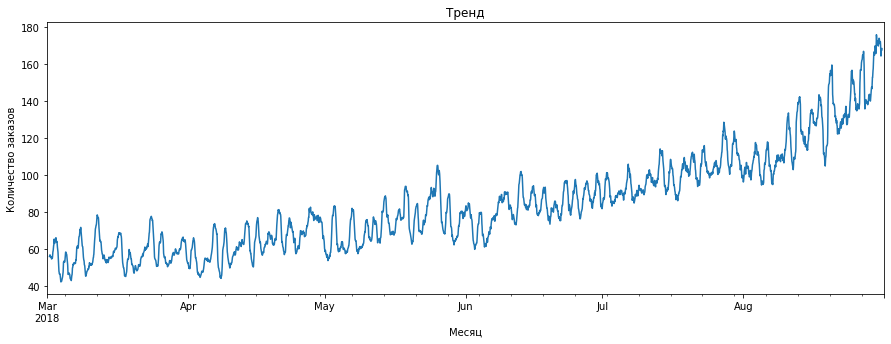

In [20]:
decomposed.trend.plot(figsize=(15,5))
plt.title('Тренд')
plt.ylabel("Количество заказов")
plt.xlabel("Месяц")
plt.show()

Мы видим что присутсвует тренд на увиличением заказов.

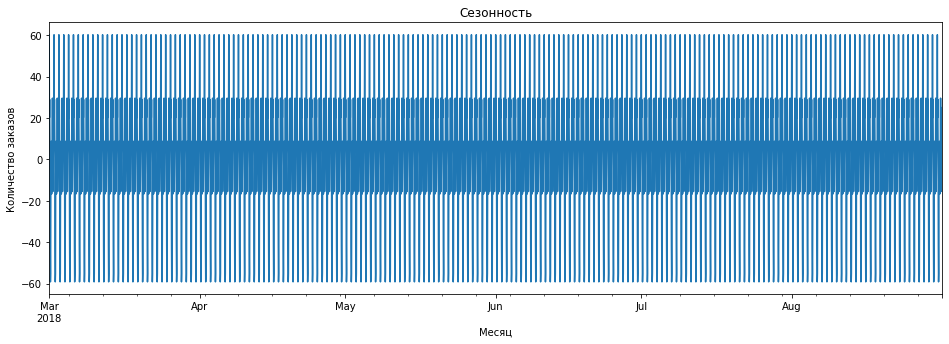

In [21]:
decomposed.seasonal.plot(figsize=(16,5))
plt.title('Сезонность')
plt.ylabel("Количество заказов")
plt.xlabel("Месяц")
plt.show()

Из графика видно, что присутсвует некоторая сезнность, в течение марта-августа цены колеблятся в пределах 1.

Остаток декомпозиции

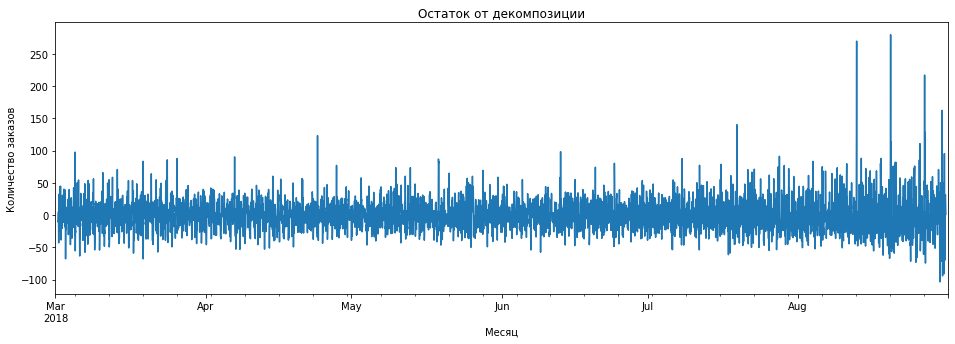

In [22]:
decomposed.resid.plot(figsize=(16,5))
plt.title('Остаток от декомпозиции')
plt.ylabel("Количество заказов")
plt.xlabel("Месяц")
plt.show()

Мы видим что в данных присутствует случайность.

####  Вывод

- Наблюдается тренд на увеличение количества заказов такси от месяца к месяцу.
- Присутствует некоторая сезонность, цены колеблется в пределах 1 в течении марта-августа.

____

### Неделя

Возьмем временной отрезок неделя и посмотрим на число заказов.

In [23]:
df_week = df['2018-04-09 00:00:00':'2018-04-23 00:00:00'].resample('1H').mean()

Посмотрим на скользящюю стреднюю

In [24]:
df_week['rolling_mean'] = df_week['num_orders'].shift().rolling(12).mean()
df_week['std'] = df_week['num_orders'].rolling(24).std()
df_week = df_week.dropna()

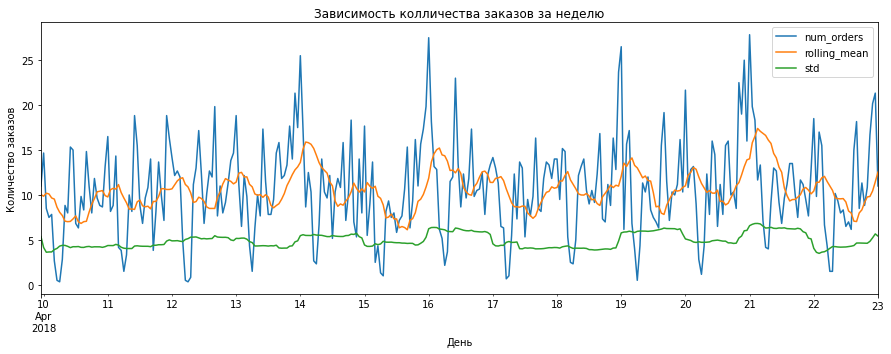

In [25]:
df_week[['num_orders', 'rolling_mean', 'std']].plot(figsize=(15,5))
plt.title('Зависимость колличества заказов за неделю')
plt.ylabel("Количество заказов")
plt.xlabel("День")
plt.show()

Можно заметить некоторую закономерность и цикличность в количестве вызов. От недели к неделе.

### День

Теперь посмотрим на день.

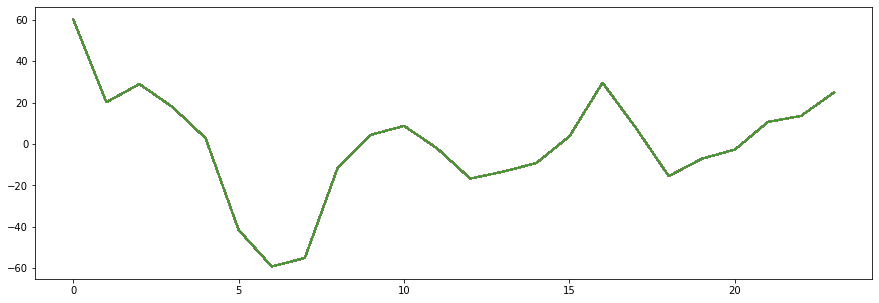

In [26]:
fig = plt.figure(figsize=(15, 5))
counter = 24
while counter < decomposed.seasonal.shape[0]:
    plt.plot(decomposed.seasonal[counter-24:counter].reset_index(drop=True), figure=fig)
    counter += 24

Из графика и таблицы видно что **пик заказов** приходится:
 - ночью - 00:00 и  01:00;
 - утром - 10:00;
 - днем - 16:00; 
 - вечером - 22:00;

Из графика и таблицы видно что **минимум заказов** приходится:
 - утром - 06:00 - вообще нет заказов

Попробуем взять другой случайный день.

###   Вывод

За время наблюдений наметился определенный тренд на общее увеличение заказов такси, которое скорее всего вызвано ростом компании.

Число заказов в течение дня не постоянно имеются временные промежутки роста числа заказов и спада.

## Обучение

Обучим модели.

### Подготовка функций

Для начала создадим DF куда положим значения RMSE

In [27]:
df_result = pd.DataFrame(columns=['rmse'])
df_result

,rmse


А теперь создадим функцию которая будет в наш Df добавлять данные.

In [28]:
def result_metrics(rmse, name_model):
    df_result.loc[name_model, 'rmse'] = rmse
    return df_result

Пропишу функцию для расчета метрики RMSE:

In [29]:
def RMSE(target, predict):
    return (mean_squared_error(target, predict))**0.5
   
#С помощию функции make_scorer создаю метрику RMSE
RMSE_score = make_scorer(RMSE, greater_is_better=False)

### Среднее значение 

Будем считать, что будущее значение переменной зависит от среднего её предыдущих значений, а значит, воспользуемся скользящей средней.

Посмотрим на прогноз, построенный по последнему наблюдаемому дню (24 часа). Для проверки возьмем 29 августа и посмотрим как он посчитает среднее значение за 28 августа. После этого будем считать что прогнозируемое число вызовов 29 августа будет равно скользящей средней.

In [30]:
def moving_average(series, n):
    return np.full(24, (np.average(series[-n:])))

In [31]:
rmse_average = np.sqrt(mean_squared_error(df_hour['2018-08-29'], moving_average(df_hour['2018-08-28'], 24)))

/tmp/ipykernel_48/2430533218.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rmse_average = np.sqrt(mean_squared_error(df_hour['2018-08-29'], moving_average(df_hour['2018-08-28'], 24)))


In [32]:
result_metrics(rmse_average, 'rolling_mean_trend"')

,rmse
"rolling_mean_trend""",54.423829


### Взвешенная средняя

In [33]:
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n-1:] * weights[n]
    return np.full(24, result)

In [34]:
rmse_weighted_average = np.sqrt(mean_squared_error(df_hour['2018-08-29'], weighted_average(df_hour['2018-08-28'], [0.6, 0.2, 0.1, 0.07, 0.03])))

/tmp/ipykernel_48/4102836159.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rmse_weighted_average = np.sqrt(mean_squared_error(df_hour['2018-08-29'], weighted_average(df_hour['2018-08-28'], [0.6, 0.2, 0.1, 0.07, 0.03])))


In [35]:
result_metrics(rmse_weighted_average, 'rolling_weighted_average"')

,rmse
"rolling_mean_trend""",54.423829
"rolling_weighted_average""",56.322731


### Подготовка данных для модели.

Создадим новые признаки:

месяц

день

день недели

час

лаги(отставания)

скользящее среднее

Создадим копию датафрейма

In [36]:
df_copy = df_hour.copy()

In [37]:
def make_features(df, max_lag, rolling_mean_size):
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    df.dropna(inplace=True)

Применим функцию с лагом до 24 часов и 100-м скользящим средним:

In [38]:
make_features(df_hour, 24, 100)

Проверим что все ОК

In [39]:
df_hour.head(5)

,num_orders,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-05 04:00:00,34.0,5,0,4,51.0,32.0,176.0,86.0,68.0,83.0,...,30.0,41.0,19.0,39.0,39.0,12.0,11.0,22.0,27.0,56.46
2018-03-05 05:00:00,16.0,5,0,5,34.0,51.0,32.0,176.0,86.0,68.0,...,30.0,30.0,41.0,19.0,39.0,39.0,12.0,11.0,22.0,55.56
2018-03-05 06:00:00,3.0,5,0,6,16.0,34.0,51.0,32.0,176.0,86.0,...,56.0,30.0,30.0,41.0,19.0,39.0,39.0,12.0,11.0,54.87
2018-03-05 07:00:00,14.0,5,0,7,3.0,16.0,34.0,51.0,32.0,176.0,...,58.0,56.0,30.0,30.0,41.0,19.0,39.0,39.0,12.0,54.19
2018-03-05 08:00:00,31.0,5,0,8,14.0,3.0,16.0,34.0,51.0,32.0,...,64.0,58.0,56.0,30.0,30.0,41.0,19.0,39.0,39.0,53.67


Поделим выборку

In [40]:
train, test = train_test_split(df_hour, shuffle=False, test_size=0.1)
train = train.dropna()
test = test.dropna()
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

Проверим что все ОК

In [41]:
print(f'train {train.shape, train.index.min(), train.index.max()}')
print(f'test {test.shape, test.index.min(), test.index.max()}')

train ((3884, 29), Timestamp('2018-03-05 04:00:00', freq='H'), Timestamp('2018-08-13 23:00:00', freq='H'))
test ((432, 29), Timestamp('2018-08-14 00:00:00', freq='H'), Timestamp('2018-08-31 23:00:00', freq='H'))


### Линейная регрессия

Так как мы работаем с временным рядом,  то кросс-валидацию в привычном виде для подбора гиперпараметров моделей с помощью GridSearchCV мы использовать не можем. Применим функцию TimeSeriesSplit().

In [42]:
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
#Объявляю модель
regression = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
#Обучаю модель
regression.fit(features_train, target_train)
#Определяю RMSE модели с помощью кросс-валидации
regression_cv_score = pd.Series(cross_val_score(regression,features_train,target_train,scoring=RMSE_score,cv=my_cv)).mean()*(-1)
result_metrics(regression_cv_score, 'LinearRegression"')
print(df_result)

                                rmse
rolling_mean_trend"        54.423829
rolling_weighted_average"  56.322731
LinearRegression"           28.55241


### Случайный лес

In [43]:
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
#Объявляю модель
forest = RandomForestRegressor()
#Определяю словарь с набором параметров
forest_parametrs = { 'n_estimators': range(1, 10, 2),
                     'max_depth': range(1, 5, 2) }

#Применяю GridSearchCV с кросс-валидацией
forest_grid = GridSearchCV(forest, forest_parametrs, scoring=RMSE_score, cv=my_cv)
forest_grid.fit(features_train, target_train)

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7fbb85bbf5f0>,
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 5, 2),
                         'n_estimators': range(1, 10, 2)},
             scoring=make_scorer(RMSE, greater_is_better=False))

Найду оптимальные гиперпараметры и качество модели на кросс-валидации:

In [44]:
forest_params = forest_grid.best_params_
forest_score = forest_grid.score(features_train, target_train) * (-1)
result_metrics(forest_score, 'RandomForestRegressor')
print(df_result)

                                rmse
rolling_mean_trend"        54.423829
rolling_weighted_average"  56.322731
LinearRegression"           28.55241
RandomForestRegressor      26.932943


### Catboost

In [45]:
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
#Объявляю модель
cb = cb.CatBoostRegressor()
#Определяю словарь с набором параметров
cb_parametrs = {'learning_rate': [0.03, 0.1],
                'depth': [4, 6, 10]
               }

#Применяю GridSearchCV с кросс-валидацией
cb_grid = GridSearchCV(cb, cb_parametrs, scoring=RMSE_score, cv=my_cv)
cb_grid.fit(features_train, target_train, verbose=False)

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7fbb85bfdeb0>,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fbb8566db50>,
             param_grid={'depth': [4, 6, 10], 'learning_rate': [0.03, 0.1]},
             scoring=make_scorer(RMSE, greater_is_better=False))

Найду оптимальные гиперпараметры и качество модели на кросс-валидации:

In [46]:
cb_params = cb_grid.best_params_
cb_score = cb_grid.score(features_train, target_train) * (-1)
result_metrics(cb_score, 'CatBoostRegressor')
print(df_result)

                                rmse
rolling_mean_trend"        54.423829
rolling_weighted_average"  56.322731
LinearRegression"           28.55241
RandomForestRegressor      26.932943
CatBoostRegressor          17.387642


 Посмотрим на самую оптимальную модель по показателю RMSE

In [47]:
df_result.sort_values(by='rmse')

,rmse
CatBoostRegressor,17.387642
RandomForestRegressor,26.932943
"LinearRegression""",28.55241
"rolling_mean_trend""",54.423829
"rolling_weighted_average""",56.322731


И так лучше всех себя показали модели - CatBoostRegressor, RandomForestRegressor, LinearRegression. Я пердлагаю остановится на CatBoostRegressor и проверить на тестовой выборке.

## Тестирование

In [48]:
import catboost as cb
#Обучаю модель на оптимальных гиперпараметрах
cb_model = cb.CatBoostRegressor(learning_rate=cb_params['learning_rate'],
                                depth=cb_params['depth'])

cb_model.fit(features_train, target_train, verbose=False)
cb_model_predictions = cb_model.predict(features_test)

In [49]:
print('RMSE модели CatBoostRegressor:', RMSE(target_test, cb_model_predictions))

RMSE модели CatBoostRegressor: 41.52053437596481


In [50]:
model_data = pd.DataFrame({"target":target_test, "predict":cb_model_predictions})

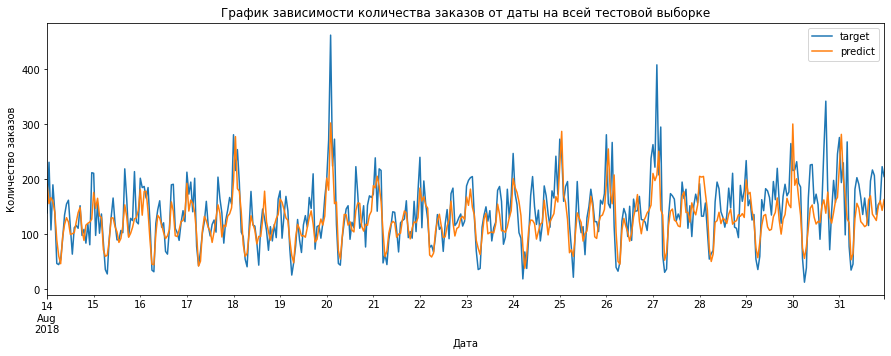

In [51]:
model_data.plot(figsize=(15, 5))
plt.title('График зависимости количества заказов от даты на всей тестовой выборке')
plt.ylabel("Количество заказов")
plt.xlabel("Дата")
plt.show()

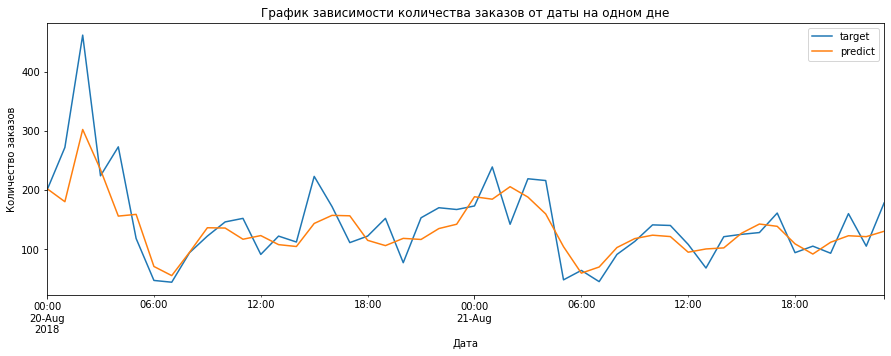

In [52]:
model_data['2018-08-20':'2018-08-21'].plot(figsize=(15, 5))
plt.title('График зависимости количества заказов от даты на одном дне')
plt.ylabel("Количество заказов")
plt.xlabel("Дата")
plt.show()
plt.show()

На тестовой выборке лучше Catboost выдал RMSE = 17, в то время как на трейне RMSE = 41, что соответсвует условию задачи.

## Вывод

- За время наблюдений наметился определенный тренд на общее увеличение заказов такси, которое скорее всего вызвано ростом компании.

- Число заказов в течение недели и дня не постоянно имеются временные промежутки роста числа заказов и спада.

- По результатм работы лучше всех себя показала модель - CatBoostRegressor с RMSE = 8.25 что соответсвует условию.